In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import keras
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import numpy as np
import pandas as pd
import warnings

In [21]:
# Sort the image and mask filenames to ensure they match

import os
import glob


# Define paths for training and testing sets
scan_training_dir = 'split_dataset/Training Set/scans'
mask_training_dir = 'split_dataset/Training Set/masks'

scan_testing_dir = 'split_dataset/Testing Set/scans' 
mask_testing_dir = 'split_dataset/Testing Set/masks'

# Get all scan file paths from subfolders
scans_training_files = sorted(glob.glob(os.path.join(scan_training_dir, '*', '*')))
mask_training_files = sorted(os.listdir(mask_training_dir))

scans_testing_files = sorted(glob.glob(os.path.join(scan_testing_dir, '*', '*')))
mask_testing_files = sorted(os.listdir(mask_testing_dir))

# Convert mask filenames to full paths
mask_training_files = [os.path.join(mask_training_dir, mask) for mask in mask_training_files]
mask_testing_files = [os.path.join(mask_testing_dir, mask) for mask in mask_testing_files]

# Ensure correct alignment by sorting based on filenames
scans_training_files = sorted(scans_training_files, key=lambda x: os.path.basename(x))
mask_training_files = sorted(mask_training_files, key=lambda x: os.path.basename(x))

scans_testing_files = sorted(scans_testing_files, key=lambda x: os.path.basename(x))
mask_testing_files = sorted(mask_testing_files, key=lambda x: os.path.basename(x))


print([os.path.basename(f) for f in scans_training_files[:5]])
print([os.path.basename(f) for f in mask_training_files[:5]])
print([os.path.basename(f) for f in scans_testing_files[:5]])
print([os.path.basename(f) for f in mask_testing_files[:5]])


#print(f"Found {len(image_files)} images and {len(mask_files)} masks")
#image_files = sorted(os.listdir('SegmentationDataset/images'))
#mask_files = sorted(os.listdir('SegmentationDataset/masks'))

['1.jpg', '10.jpg', '1000.jpg', '1001.jpg', '1002.jpg']
['1.jpg', '10.jpg', '1000.jpg', '1001.jpg', '1002.jpg']
['100.jpg', '1003.jpg', '1013.jpg', '1016.jpg', '1017.jpg']
['100.jpg', '1003.jpg', '1013.jpg', '1016.jpg', '1017.jpg']


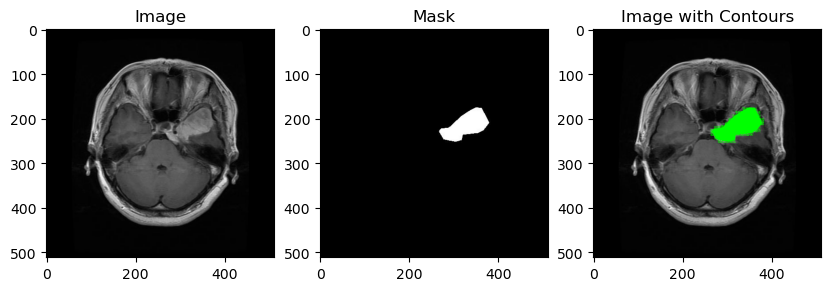

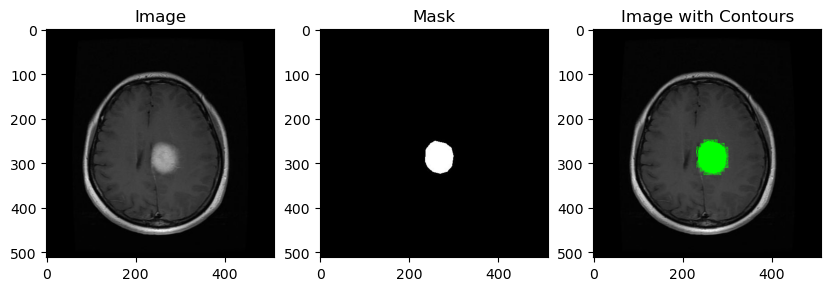

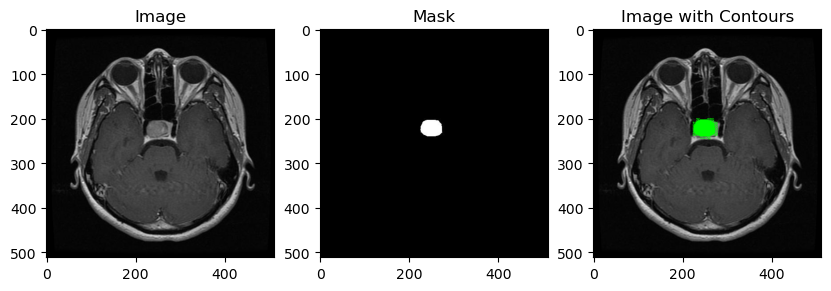

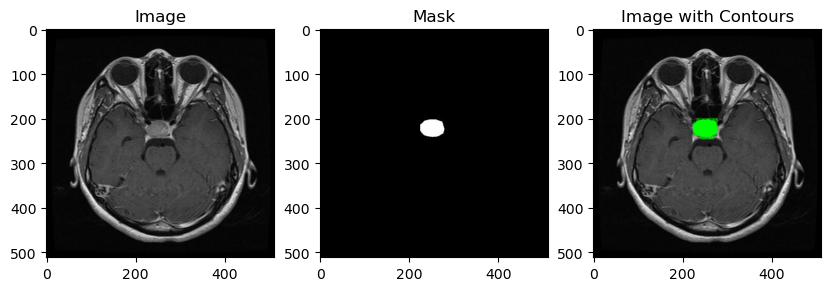

In [12]:
def display_images_masks(scans_files, masks_files):
    count = 0
    for image_file, mask_file in zip(scans_files, masks_files):
        if count >= 4:  # Display only the first 4 images
            break
        
        # Load image and mask
        image = cv2.imread(image_file)
        mask = cv2.imread(mask_file)

        # Check if files are loaded properly
        if image is None:
            raise ValueError(f"Image at path {image_file} could not be loaded")
        if mask is None:
            raise ValueError(f"Mask at path {mask_file} could not be loaded")

        # Plot images
        plt.figure(figsize=(10, 10))
        
        # First subplot: Image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
        plt.title('Image')

        # Second subplot: Mask
        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
        plt.title('Mask')

        # Third subplot: Image with contours
        plt.subplot(1, 3, 3)
        sample = np.array(np.squeeze(mask), dtype=np.uint8)
        contours, _ = cv2.findContours(sample[:, :, 1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        sample_over_gt = cv2.drawContours(image.copy(), contours, -1, [0, 255, 0], thickness=-1)
        plt.imshow(cv2.cvtColor(sample_over_gt, cv2.COLOR_BGR2RGB))
        plt.title('Image with Contours')

        plt.show()
        count += 1

# Call the function using previously defined lists of file paths
display_images_masks(scans_training_files, mask_training_files)

In [13]:
import os
import cv2
from tqdm import tqdm

images_size = []
masks_size = []

# Loop through the scans and corresponding masks
for image_file, mask_file in tqdm(zip(scans_training_files, mask_training_files), total=len(scans_training_files)):

    image = cv2.imread(image_file)
    mask = cv2.imread(mask_file)

    if image is None:
        raise ValueError(f"Image at path {image_file} could not be loaded")
    if mask is None:
        raise ValueError(f"Mask at path {mask_file} could not be loaded")

    images_size.append(image.shape)
    masks_size.append(mask.shape)

# Print unique image and mask sizes
print(list(set(images_size)))
print("=================")
print(list(set(masks_size)))


100%|██████████| 3654/3654 [00:05<00:00, 723.01it/s]

[(488, 504, 3), (263, 236, 3), (290, 236, 3), (717, 717, 3), (444, 468, 3), (243, 236, 3), (302, 216, 3), (1446, 1375, 3), (210, 233, 3), (530, 380, 3), (512, 434, 3), (251, 447, 3), (250, 201, 3), (274, 230, 3), (252, 236, 3), (442, 442, 3), (249, 201, 3), (320, 296, 3), (218, 233, 3), (480, 853, 3), (725, 728, 3), (484, 405, 3), (483, 430, 3), (600, 600, 3), (248, 208, 3), (417, 428, 3), (630, 630, 3), (223, 236, 3), (614, 630, 3), (344, 320, 3), (228, 235, 3), (273, 236, 3), (236, 236, 3), (243, 200, 3), (244, 206, 3), (470, 469, 3), (273, 251, 3), (214, 229, 3), (496, 453, 3), (264, 235, 3), (248, 203, 3), (474, 356, 3), (1024, 1024, 3), (277, 235, 3), (295, 236, 3), (217, 232, 3), (600, 494, 3), (247, 204, 3), (262, 224, 3), (238, 212, 3), (280, 229, 3), (216, 236, 3), (244, 262, 3), (201, 210, 3), (236, 255, 3), (490, 410, 3), (201, 236, 3), (777, 622, 3), (218, 225, 3), (442, 332, 3), (257, 235, 3), (1080, 1920, 3), (225, 234, 3), (315, 236, 3), (222, 233, 3), (260, 314, 3), (83

In [14]:
def preprocess_data(scans, masks, size=(256, 256)):
    images_preprocessed = []
    masks_preprocessed = []

    for scan_file, mask_file in tqdm(zip(scans, masks), total=len(scans)):
        # Load scan and mask
        scan = cv2.imread(scan_file, cv2.IMREAD_GRAYSCALE)  # Read scan in grayscale
        mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)  # Read mask in grayscale

        if scan is None:
            raise ValueError(f"Scan at path {scan_file} could not be loaded")
        if mask is None:
            raise ValueError(f"Mask at path {mask_file} could not be loaded")

        # Resize images to uniform size
        scan_resized = cv2.resize(scan, size, interpolation=cv2.INTER_AREA)
        mask_resized = cv2.resize(mask, size, interpolation=cv2.INTER_NEAREST)

        # Normalize scan pixel values to [0,1]
        scan_resized = scan_resized.astype(np.float32) / 255.0
        mask_resized = mask_resized.astype(np.uint8)  # Keep mask values as 0 or 1

        # Expand dimensions to match expected input format (H, W, 1)
        scan_resized = np.expand_dims(scan_resized, axis=-1)
        mask_resized = np.expand_dims(mask_resized, axis=-1)

        images_preprocessed.append(scan_resized)
        masks_preprocessed.append(mask_resized)

    return np.array(images_preprocessed), np.array(masks_preprocessed)


In [16]:
X_train, y_train = preprocess_data(scans_training_files, mask_training_files)
X_test, y_test = preprocess_data(scans_testing_files, mask_testing_files)

100%|██████████| 915/915 [00:01<00:00, 625.83it/s]


In [18]:
print('The shape of X_train',X_train.shape)
print('The shape of y_train',y_train.shape)
print('The shape of X_test',X_test.shape)
print('The shape of y_test',y_test.shape)

The shape of X_train (3654, 256, 256, 1)
The shape of y_train (3654, 256, 256, 1)
The shape of X_test (915, 256, 256, 1)
The shape of y_test (915, 256, 256, 1)


In [14]:
smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [15]:
def unet_model(input_size=(256, 256, 1), num_classes=1):
    inputs = keras.layers.Input(input_size)

    # Encoding (Downsampling)
    c1 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = keras.layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Decoding (Upsampling)
    u6 = keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = keras.layers.concatenate([u6, c4])
    c6 = keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = keras.layers.concatenate([u7, c3])
    c7 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = keras.layers.concatenate([u8, c2])
    c8 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = keras.layers.concatenate([u9, c1], axis=3)
    c9 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    # Output layer
    outputs = keras.layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(c9)

    model = keras.models.Model(inputs=[inputs], outputs=[outputs])
    
    return model


In [16]:
# Create and compile the model
model = unet_model(input_size=(256, 256,1), num_classes=1)
model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_loss, metrics=['accuracy',dice_coef])

In [17]:
# Summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
earlystopping=tf.keras.callbacks.EarlyStopping(patience=20,
                                            monitor='val_accuracy',
                                            restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                 factor=0.2, 
                                                 patience=15, 
                                                 min_lr=0.0001, 
                                                 mode='min')

In [19]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_test, y_test),
                    verbose=1, callbacks=[earlystopping, reduce_lr])

Epoch 1/10


In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
u_net_loss,u_net_accuracy,u_net_dice_coef=model.evaluate(X_test,y_test)
print(f'Loss is {u_net_loss}')
print(f'Accuracy is {u_net_accuracy}')
print(f'Dice_Coef is {u_net_dice_coef}')

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(np.uint8)

In [ ]:
for i in range(50):
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(X_test[i],cmap='gray')
    
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(y_pred[i].squeeze(), cmap='gray')
    
    plt.show()

In [ ]:
import gdown

file_id = "1lxUFguKW-FQAqc_32plYclWMBT1t4_dQ"
output_path = "unet_weights.keras"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)

In [ ]:
from tensorflow import keras

model_path = "unet_weights.keras"  # Update the path if needed
model = keras.models.load_model(model_path)